In [82]:
#stationary 한지 확인하기

In [83]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
df = \
pd.read_csv('monthly-milk-production.csv',
           index_col='Month', parse_dates=True)

In [85]:
df.head()

,pounds per cow
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
pounds per cow    168 non-null int64
dtypes: int64(1)
memory usage: 2.6 KB


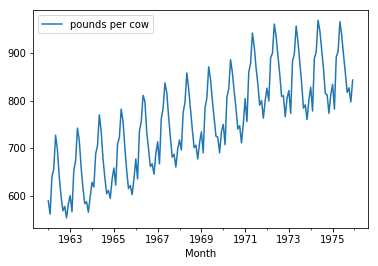

In [87]:
 df.plot() # 트렌드 ㅇㅇ 연간 단위로 시즈널 있음. 확인할 수 있지만 스테이셔널하게 트렌드랑 시즈널을 없애면 눈으로 확인하기 어려움

In [88]:
timeseries = df['pounds per cow']

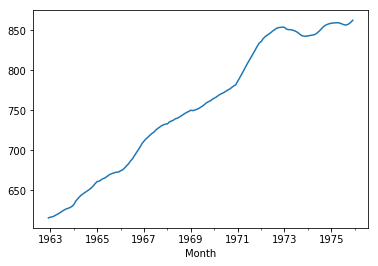

In [89]:
timeseries.rolling(12).mean().plot() # 1년단위라서 rolling

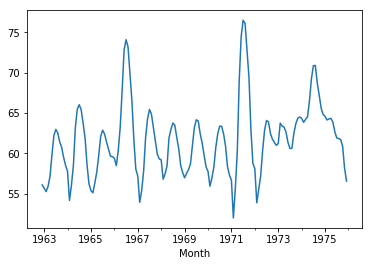

In [90]:
timeseries.rolling(12).std().plot()

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [92]:
decomposition = seasonal_decompose(df['pounds per cow'])

<Figure size 432x288 with 0 Axes>

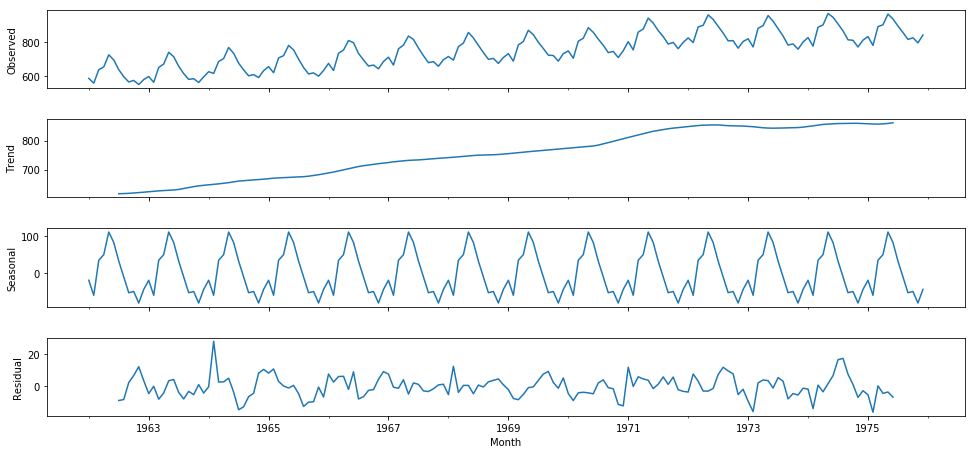

In [93]:
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15,7)

In [94]:
from statsmodels.tsa.stattools import adfuller

In [95]:
result = adfuller(df['pounds per cow'])

In [96]:
result #튜플에 딕셔너리 모양으로 불친절하게 나옴 
# p값, 0.5보다 작으면 스테이셔널하다.

(-1.3038115874221285,
 0.6274267086030321,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [97]:
def adf_check(ts):
    resutlt = adfuller(ts)
    if result[1] <= 0.05 :
        print('Stationary {}'.format(result[1]))
    else:
        print('Non stationary'.format(result[1]))

In [98]:
adf_check(df['pounds per cow'])

Non stationary


In [99]:
df['1st diff'] = df['pounds per cow'] - df['pounds per cow'].shift(1) # first 디프런싱 값

In [100]:
df.head()

,pounds per cow,1st diff
Month,,
1962-01-01,589,NaN
1962-02-01,561,-28.0
1962-03-01,640,79.0
1962-04-01,656,16.0
1962-05-01,727,71.0


In [101]:
adf_check(df['1st diff'].dropna()) #stationary라고 나와야하는데..?

Non stationary


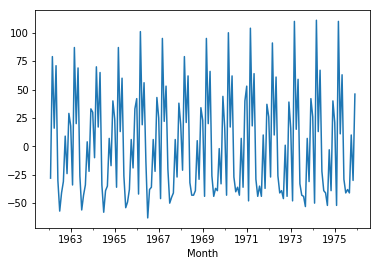

In [102]:
df['1st diff'].plot()

In [103]:
df['2nd diff'] = df['1st diff'] - df['1st diff'].shift(1)

In [104]:
adf_check(df['2nd diff'].dropna()) 

Non stationary


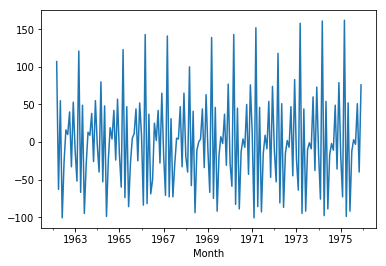

In [105]:
df['2nd diff'].plot() # 2nd 디퍼런싱 하니까 패턴을 보임

In [106]:
df['seasonal diff'] = df['pounds per cow'] - df['pounds per cow'].shift(12)

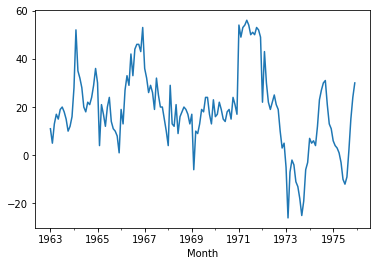

In [107]:
df['seasonal diff'].plot() #노이즈같긴 한데 ..

In [108]:
adf_check(df['seasonal diff'].dropna()) # 스테이셔너리 나와야하는데..?

Non stationary


In [109]:
df['seasonal 1st diff']= df['1st diff'] - df['1st diff'].shift(12)

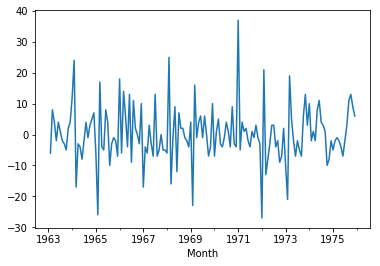

In [110]:
df['seasonal 1st diff'].plot()

In [111]:
adf_check(df['seasonal 1st diff'].dropna())

Non stationary


In [112]:
d=1, D=1

SyntaxError: can't assign to literal (<ipython-input-112-38765f6bea7a>, line 1)

In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

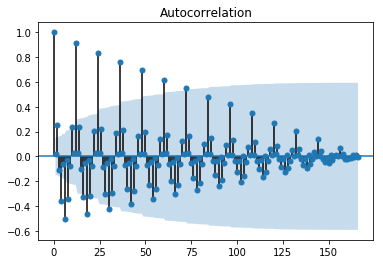

In [114]:
plot_acf(df['1st diff'].dropna());

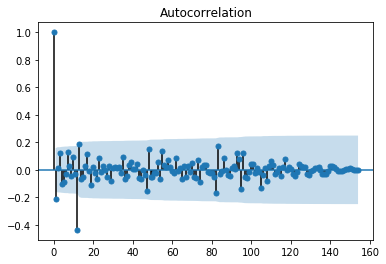

In [115]:
plot_acf(df['seasonal 1st diff'].dropna());

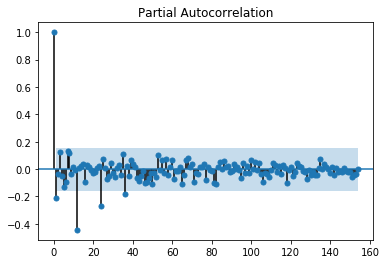

In [116]:
plot_pacf(df['seasonal 1st diff'].dropna(), method='ywm');

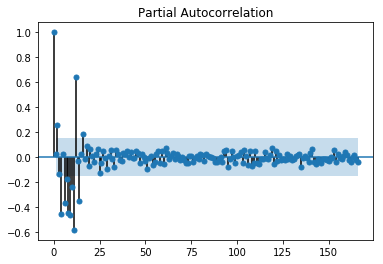

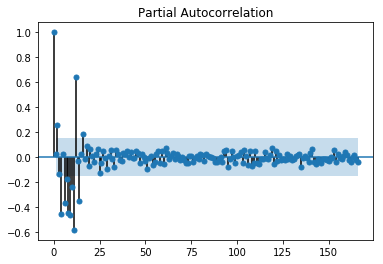

In [117]:
plot_pacf(df['1st diff'].dropna(), method='ywm')

In [ ]:
P=1, Q=1

In [ ]:
p=0, d=1, q=0

In [ ]:
P=1, D=1, Q=1

In [118]:
model = sm.tsa.statespace.SARIMAX(df['pounds per cow'], order=(0,1,0),
                                 seasonal_order=(1,1,1,12))

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [119]:
result = model.fit()

In [120]:
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:                     pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Thu, 24 Jan 2019   AIC                           1074.131
Time:                                    18:39:05   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

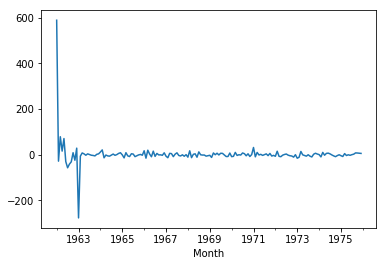

In [121]:
result.resid.plot()

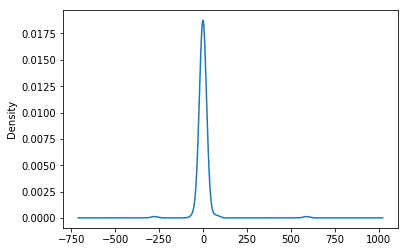

In [122]:
result.resid.plot(kind='kde')

In [123]:
len(df['pounds per cow'])

168

In [124]:
df['forecast'] = result.predict(start=150, end=168, dynamic=True)

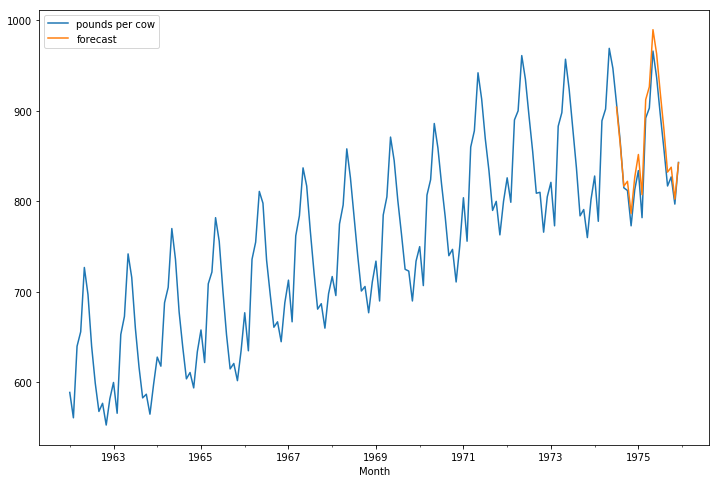

In [125]:
df[['pounds per cow','forecast']].plot(figsize=(12,8))

In [126]:
from datetime import datetime

In [127]:
def dateparser(x):
    return datetime.strptime('190'+x, "%Y-%m")
#"1-01" -> "1901-01"

In [128]:
dateparser('1-01')

datetime.datetime(1901, 1, 1, 0, 0)

In [129]:
shampoo= \
pd.read_csv('sales-of-shampoo.csv',index_col='Month', parse_dates=True, date_parser=dateparser)

In [130]:
shampoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1901-01-01 to 1903-12-01
Data columns (total 1 columns):
Sales of shampoo    36 non-null float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [131]:
adf_check(shampoo['Sales of shampoo'])

TypeError: 'SARIMAXResultsWrapper' object does not support indexing

In [ ]:
shampoo['1st diff']=shampoo['Sales of shampoo'] - shampoo['Sales of shampoo'].shift(1)

In [ ]:
adf_check(shampoo['1st diff'].dropna())

In [ ]:
....

In [132]:
from statsmodels.tsa.arima_model import ARIMA

In [139]:
p = list(range(0,5))
d = [1,2]
q = [0]

In [140]:
import itertools

In [141]:
pdq = list(itertools.product(p,d,q))

In [142]:
pdq

[(0, 1, 0),
 (0, 2, 0),
 (1, 1, 0),
 (1, 2, 0),
 (2, 1, 0),
 (2, 2, 0),
 (3, 1, 0),
 (3, 2, 0),
 (4, 1, 0),
 (4, 2, 0)]

In [143]:
for param in pdq:
    model = ARIMA(shampoo['Sales of shampoo'], order=param)
    result=model.fit()
    print('ARIMA{} - AIC:{}'.format(param, result.aic))

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\anaconda\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)

ARIMA(0, 1, 0) - AIC:430.87311187552797
ARIMA(0, 2, 0) - AIC:461.1578257086931
ARIMA(1, 1, 0) - AIC:406.02228959250067
ARIMA(1, 2, 0) - AIC:423.9000860377654


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0) - AIC:403.62756411660655


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 2, 0) - AIC:412.9993824970829


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(3, 1, 0) - AIC:404.69245918163585


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(3, 2, 0) - AIC:410.91092658457666


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(4, 1, 0) - AIC:404.78676855669335


D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(4, 2, 0) - AIC:403.9482289506699


In [ ]:
p=4, d=2, q=0

In [146]:
X=shampoo['Sales of shampoo'].values

In [149]:
size = int(len(X)*0.66)

In [158]:
train, test=X[:size], X[size:]
predictions=[]

In [159]:
len(train)

23

In [160]:
len(test)

13

In [161]:
history = [x for x in train]

In [162]:
for t in range(len(test)):
    model = ARIMA(history, order=(4,2,0))
    result = model.fit(disp=0)
    output = result.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    

D:\anaconda\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\anaconda\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
D:\anaconda\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which wi

In [163]:
from sklearn.metrics import mean_squared_error

In [164]:
error = mean_squared_error(test, predictions)

In [165]:
rmse = np.sqrt(error)

In [166]:
rmse

87.15685470038778

In [167]:
shampoo['Sales of shampoo'].describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo, dtype: float64

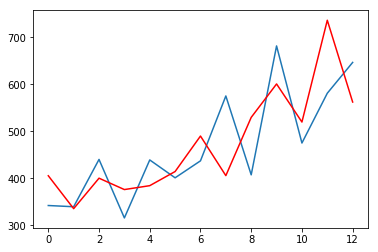

In [168]:
plt.plot(test)
plt.plot(predictions, color='red')